In [1]:
import eeg_decoder 
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [5]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [12]:
time_window = 50
time_step = 50
trial_average = 20
n_splits = 10
group_dict = OrderedDict([('Color',color),('Orientation',ori)])

wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [13]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    # xdata,ydata = wrangl.setup_data(xdata,ydata)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [15]:
interp = eeg_decoder.Interpreter(clfr)
# interp.labels = [1,2]

Significant timepoints: [ 250  300  350  400  450  500  550  600  650  700  750  850  900  950
 1000 1050 1100 1200]
Mean delay accuracy: 0.6169028340080973
Mean delay S.D.: 0.03501108397597636


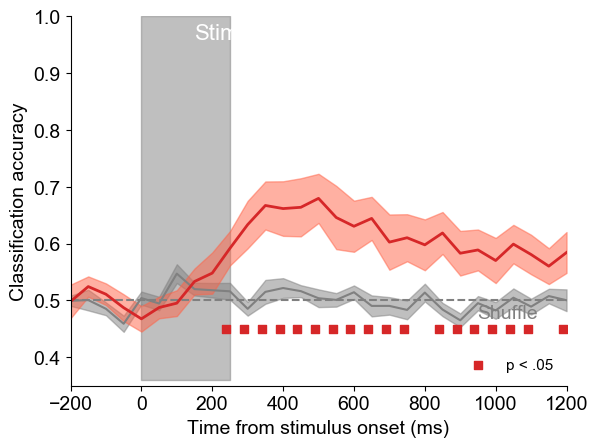

In [20]:
interp.plot_acc(significance_testing=True,savefig=False,ylim=[.35,1],chance_text_y=.22)
plt.show()